# HybridCloudSim (SC2025 Workshop) — Minimal End-to-End Run

This notebook demonstrates the simplest end-to-end run of the **HybridCloud** simulation:
- Instantiate **QPU devices** (IBM backends)
- Instantiate **CPU devices**
- Build a **hybrid simulation environment**
- Run the simulation using a **CSV workload trace**

---

## 1. Overview

### What this example does
This script creates a hybrid environment with:
- Two QPUs: `IBM_Kawasaki`, `IBM_Kyiv`
- Two CPUs: `CPU-1`, `CPU-2`
- A hybrid broker: `HybridBroker`
- A job feed method: `dispatcher`
- A workload trace: `synth_job_batches/1000-job.csv`

Then it runs the simulation via `sim_env.run()`.

### Expected inputs
- The `HybridCloud` package/module must be available (local source or installed)
- The workload CSV file must exist at: `synth_job_batches/1000-job.csv`

---

## 2. Code: Minimal runnable example


In [1]:
# main.py

from HybridCloud import *

PRINTLOG = False
# Devices
ibm_kawasaki = IBM_Kawasaki(env=None, name="QPU-1", printlog = PRINTLOG)
ibm_kyiv = IBM_Kyiv(env=None, name="QPU-2", printlog = PRINTLOG)
cpu1 = CPU("CPU-1", env=None)
cpu2 = CPU("CPU-2", env=None)

# Hybrid environment
sim_env = HybridCloudSimEnv(
    qpu_devices = [ibm_kawasaki, ibm_kyiv],
    cpu_devices = [cpu1, cpu2],
    broker_class = HybridBroker,
    job_feed_method = 'dispatcher',
    file_path = 'synth_job_batches/1000-job.csv', 
    job_generation_model = None, 
    printlog = PRINTLOG, 
    cost_config = None
)

sim_env.run()

0.00: SIMULATION STARTED
1099.97: SIMULATION ENDED
Number of jobs processed: 1000


## Job-Level Execution Visualization 
### Goal
This section validates that the **HybridCloudSim execution pipeline** correctly:
- records per-job lifecycle events,
- exposes them through the `JobRecordsManager`, and
- supports downstream visualization for debugging and analysis.

The intent is **developer verification**, not performance evaluation.

---

### What is being tested
- End-to-end job bookkeeping across CPU and QPU stages
- Correct population of `job_records` after `sim_env.run()`
- Compatibility between recorded job phases and visualization utilities

---

### Visualization test
We extract job execution records from the simulation environment and visualize
the **first 10 jobs** to keep the plot readable and deterministic.

This produces a phase-timeline figure (ghent chart) showing:
- job arrival,
- CPU execution phases,
- QPU execution phases,
- inter-stage transitions.

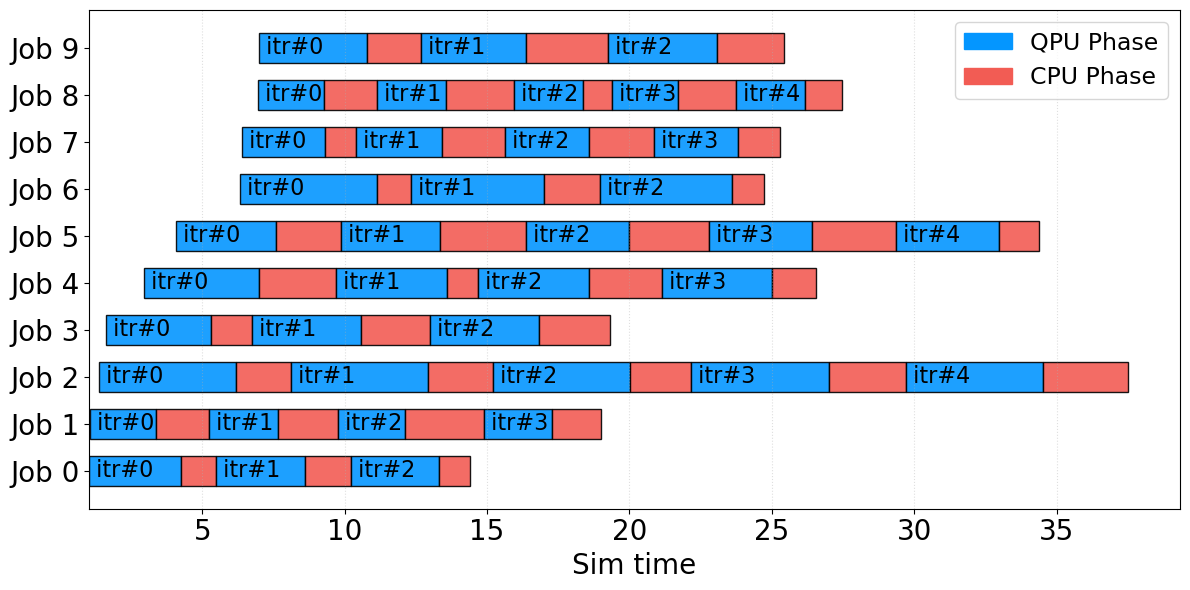

<Figure size 640x480 with 0 Axes>

In [7]:
# from viz import plot_all

job_records = sim_env.job_records_manager.get_job_records()
# plot_all(job_records)

first_ten = dict(list(job_records.items())[:10])
plot_all(first_ten, 10)
plt.savefig("results/job_phases.png", dpi=300, bbox_inches="tight")

## Hybrid Resource Utilization Histogram 

This section verifies that **device usage accounting** is correctly computed
from job execution records and aggregated at the **system level**.

We compute device usage units from completed job records and generate a
histogram-style visualization showing **hybrid resource utilization**.

This is intended for **sanity checking and regression testing**, not for
reporting performance results.


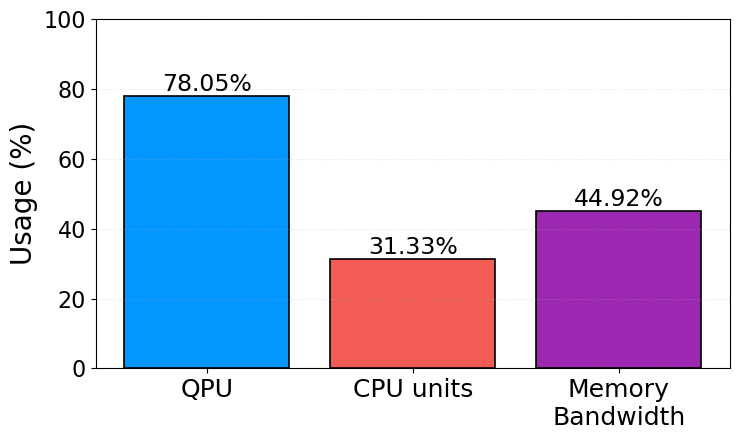

<Figure size 640x480 with 0 Axes>

In [5]:
results = calculate_device_usage_units(job_records, sim_env)
plot_hybrid_utilization(results)
plt.savefig("results/usage.png", dpi=300, bbox_inches="tight")

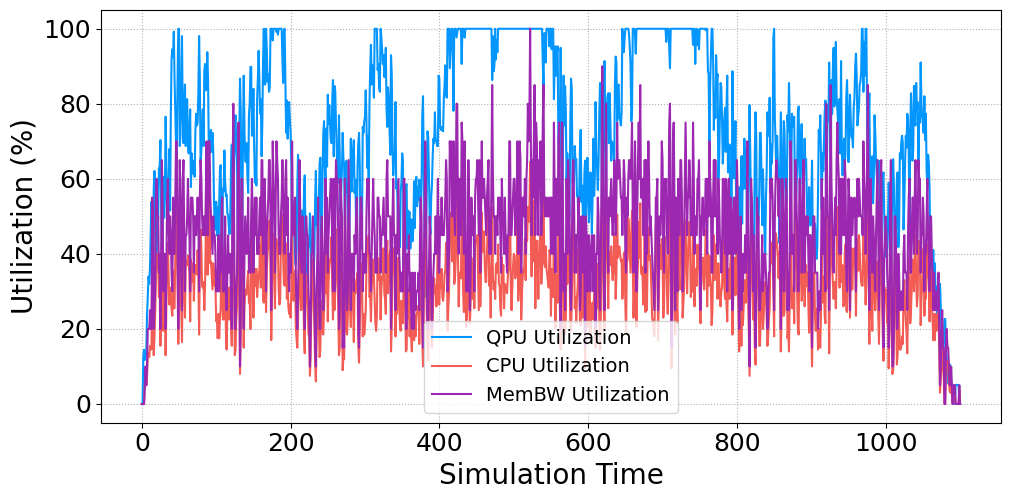

<Figure size 640x480 with 0 Axes>

In [6]:
time_points, qpu_util, cpu_util, mem_util = utilization_time_series(job_records, 256, 200, 400, step = 1.0)
plot_utilization_over_time(time_points, qpu_util, cpu_util, mem_util)
plt.savefig("results/usage_timeline.png", dpi=300, bbox_inches="tight")